<a href="https://colab.research.google.com/github/AndSiq97/Projects-Classification-By-Main-Category/blob/main/Projects_Classification_by_Main_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
#from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Uncomment this cell, run this, comment out, and then restart runtime to run entire notebook
# !pip install --upgrade matplotlib

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle


Load Data

In [32]:
# Reading CSV file as Pandas DataFrame
df = pd.read_csv('/content/gdrive/MyDrive/projects_classification.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,name,goal,sub_category,main_category,launched,deadline
0,0,The Songs of Adelaide & Abullah,1000,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09 11:36:00
1,1,Where is Hank?,45000,Narrative Film,Film & Video,2013-01-12 00:20:50,2013-02-26 00:20:50
2,2,ToshiCapital Rekordz Needs Help to Complete Album,5000,Music,Music,2012-03-17 03:24:11,2012-04-16 04:24:11
3,3,Community Film Project: The Art of Neighborhoo...,19500,Film & Video,Film & Video,2015-07-04 08:35:03,2015-08-29 01:00:00
4,4,Monarch Espresso Bar,50000,Restaurants,Food,2016-02-26 13:38:27,2016-04-01 13:38:27


Data Exploratory Analysis and Visualizations

In [6]:
# Check columns of dataframe
df.columns

Index(['Unnamed: 0', 'name', 'goal', 'sub_category', 'main_category',
       'launched', 'deadline'],
      dtype='object')

In [7]:
# Check shape of dataframe
df.shape

(323125, 7)

In [8]:
# Brief information about columns of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323125 entries, 0 to 323124
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     323125 non-null  int64 
 1   name           323121 non-null  object
 2   goal           323125 non-null  object
 3   sub_category   323125 non-null  object
 4   main_category  323125 non-null  object
 5   launched       323125 non-null  object
 6   deadline       323125 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.3+ MB


In [9]:
# Checking number of NULL values in ENTIRE DataFrame
df.isnull().sum().sum()

4

In [10]:
# Dropping rows where there is AT LEAST one NULL value
df = df.dropna(how = 'any')

# Checking to see if there are no NULL values
df.isnull().sum().sum()

0

In [11]:
# Import library from datetime
from datetime import date
from datetime import datetime

df['launched'] = df['launched'].apply(str)
df['deadline'] = df['deadline'].apply(str)

# Convert columns to datetime types
df['launched'] = pd.to_datetime(df['launched'], errors = 'coerce')
df['deadline'] = pd.to_datetime(df['deadline'], errors = 'coerce')

In [12]:
# Create new column named 'Duration'
df['Duration'] = (df['deadline'] - df['launched']).dt.days

In [13]:
print(df.isnull().sum().sum())

# Dropping rows where there is AT LEAST one NULL value
df = df.dropna(how = 'any')

# Checking to see if there are no NULL values
print(df.isnull().sum().sum())

19
0


In [14]:
# Drop Irrelevant columns not needed for Machine Learning Modelling
df.drop(['Unnamed: 0', 'launched', 'deadline'], axis = 1, inplace = True)
df.head()

,name,goal,sub_category,main_category,Duration
0,The Songs of Adelaide & Abullah,1000,Poetry,Publishing,58.0
1,Where is Hank?,45000,Narrative Film,Film & Video,45.0
2,ToshiCapital Rekordz Needs Help to Complete Album,5000,Music,Music,30.0
3,Community Film Project: The Art of Neighborhoo...,19500,Film & Video,Film & Video,55.0
4,Monarch Espresso Bar,50000,Restaurants,Food,35.0


In [15]:
# Frequency counts of Main Categories
print(df['main_category'].value_counts())

Film & Video    57661
Music           46718
Publishing      34221
Games           28004
Technology      26116
Art             23958
Design          23864
Food            21198
Fashion         18382
Theater          9962
Photography      9664
Comics           8743
Crafts           7182
Journalism       4069
Dance            3372
Name: main_category, dtype: int64


In [16]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

Text(0, 0.5, 'Count')

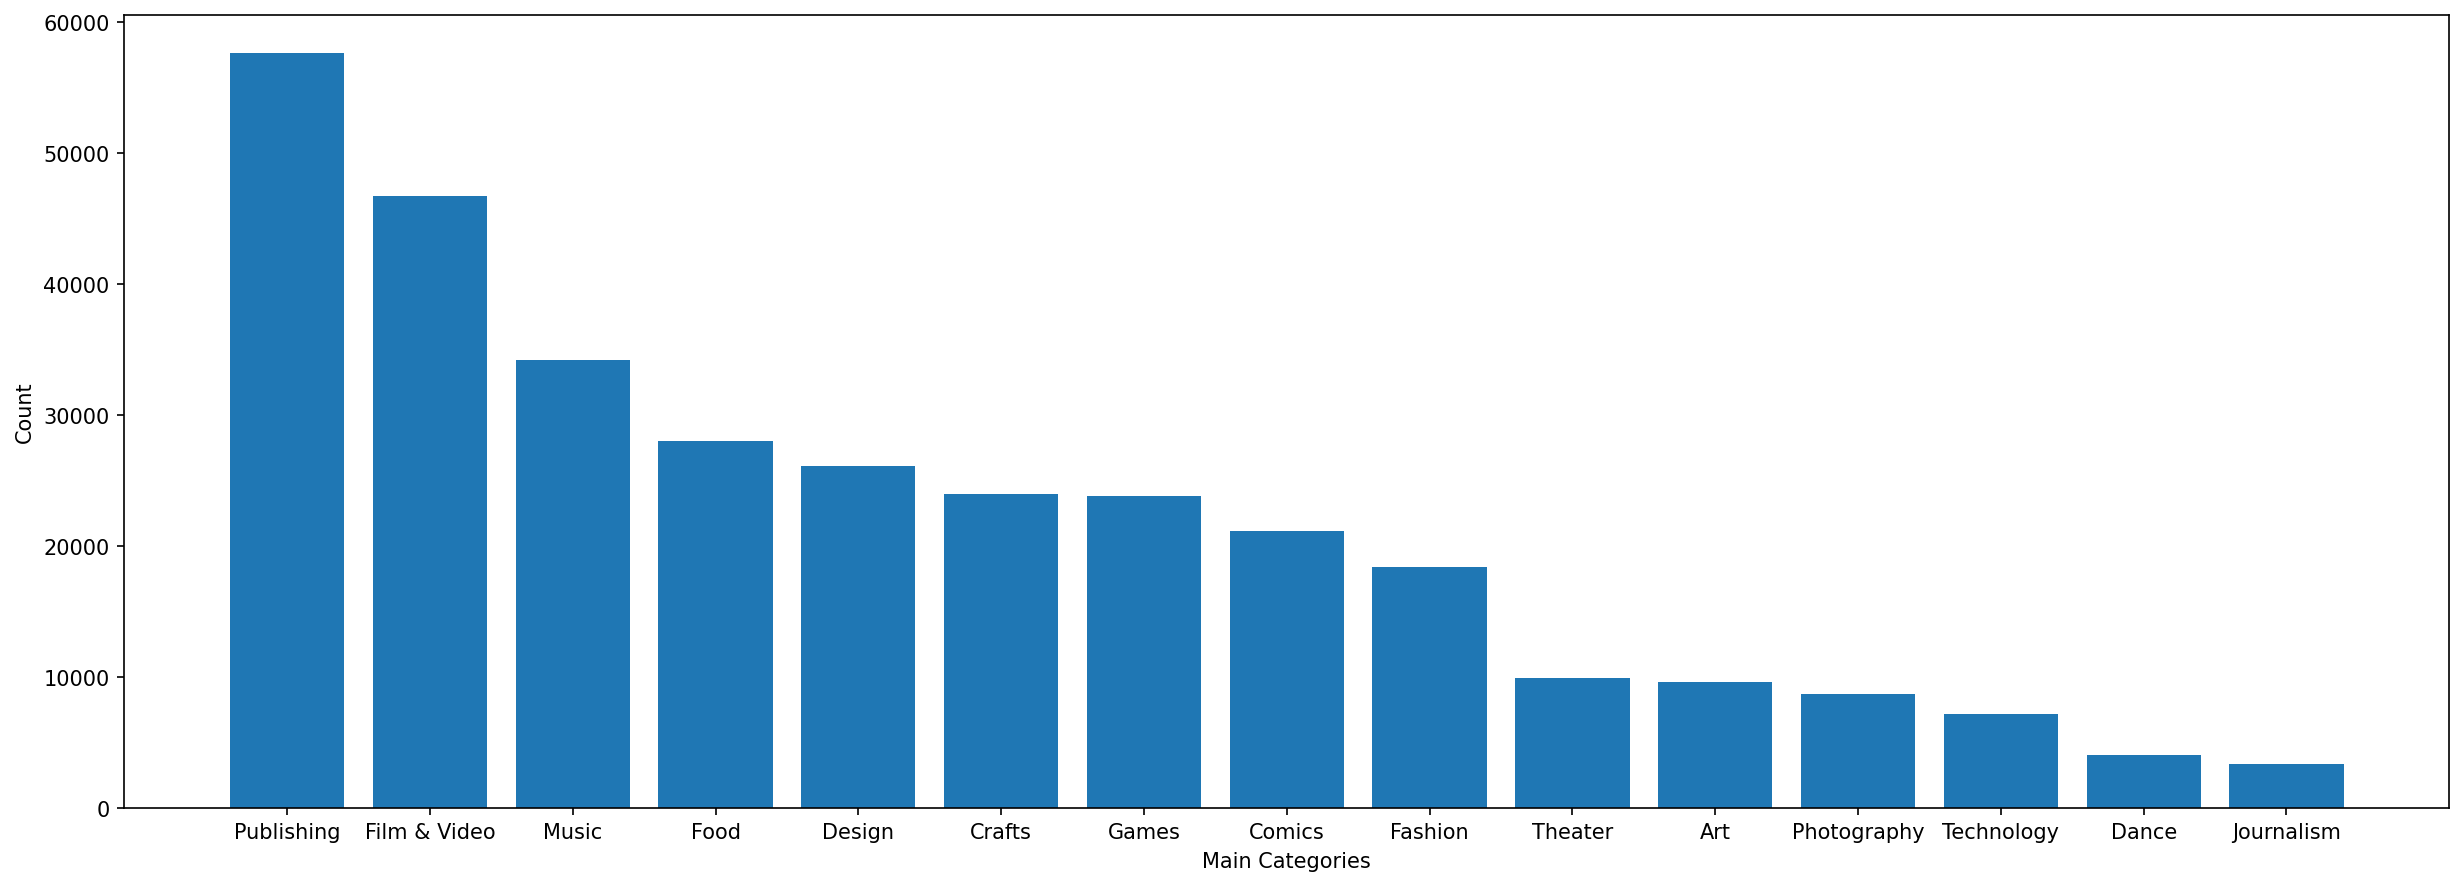

In [17]:
# Plot Frequency of Main Categories
from matplotlib.pyplot import figure
figure(figsize=(20, 7), dpi=150)

plt.bar(df['main_category'].unique(), df['main_category'].value_counts())
plt.xlabel('Main Categories')
plt.ylabel('Count')

In [18]:
# Frequency counts of Sub Categories
df['sub_category'].value_counts()

Product Design    17476
Documentary       14891
Music             13907
Shorts            11681
Tabletop Games    10708
                  ...  
Weaving              69
Residencies          54
Letterpress          36
Chiptune             33
Taxidermy            11
Name: sub_category, Length: 158, dtype: int64

In [19]:
# Average Duration (of Project) Between Main Categories
group = df.groupby("main_category")["Duration"].mean()
group

main_category
Art             33.424785
Comics          34.601739
Crafts          31.583821
Dance           32.856762
Design          35.056612
Fashion         32.913829
Film & Video    35.721146
Food            33.874516
Games           32.758285
Journalism      34.416073
Music           35.689006
Photography     33.817984
Publishing      34.399550
Technology      35.307321
Theater         34.919293
Name: Duration, dtype: float64

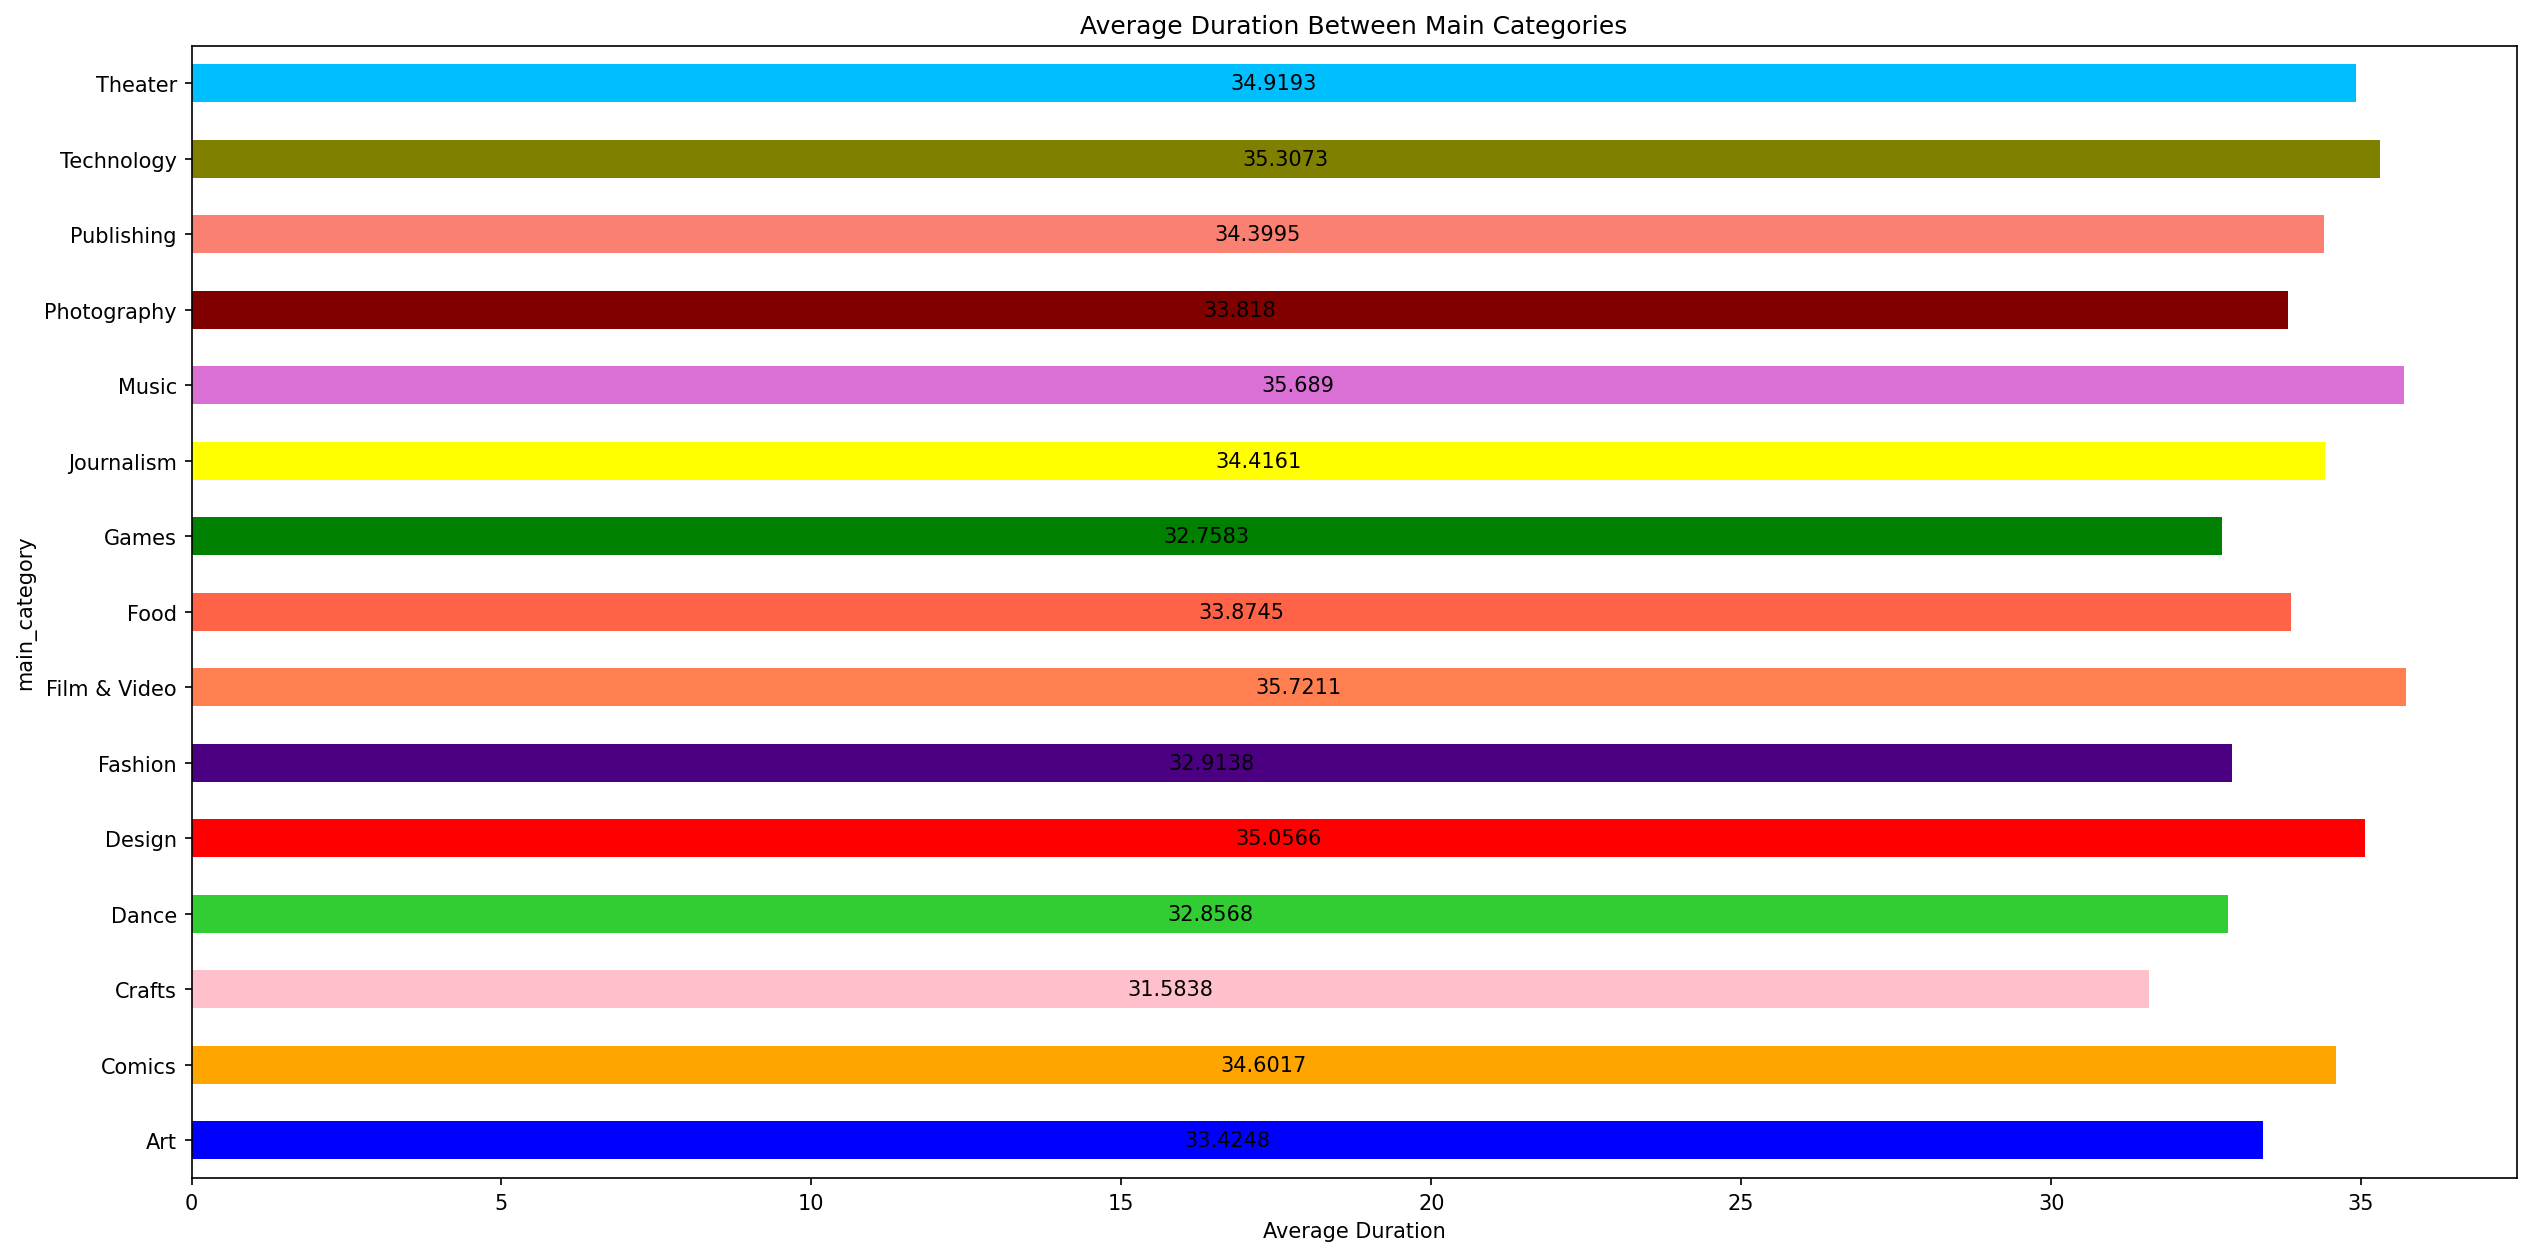

In [20]:
# Plot Average Duration between Main Categories

from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=150)

plt.title("Average Duration Between Main Categories")
plt.xlabel("Average Duration")

ax = group.plot(kind='barh', color=['blue','orange', 'pink', 'limegreen', 'red', 'indigo',
                                   'coral', 'tomato', 'green', 'yellow', 'orchid',
                                   'maroon', 'salmon', 'olive', 'deepskyblue'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

In [21]:
# Average Goal (Average Amount of Money Claimed for Project) Between Main Categories
df['goal'] = df['goal'].apply(pd.to_numeric)
group = df.groupby("main_category")["goal"].mean()
group

main_category
Art              36413.842416
Comics           22910.229817
Crafts           11710.819618
Dance             9719.983778
Design           49202.222047
Fashion          24751.340162
Film & Video     72989.640289
Food             50572.268969
Games            55624.263327
Journalism       95423.538285
Music            15312.500909
Photography      12719.892540
Publishing       30662.741736
Technology      116349.361663
Theater          26501.276311
Name: goal, dtype: float64

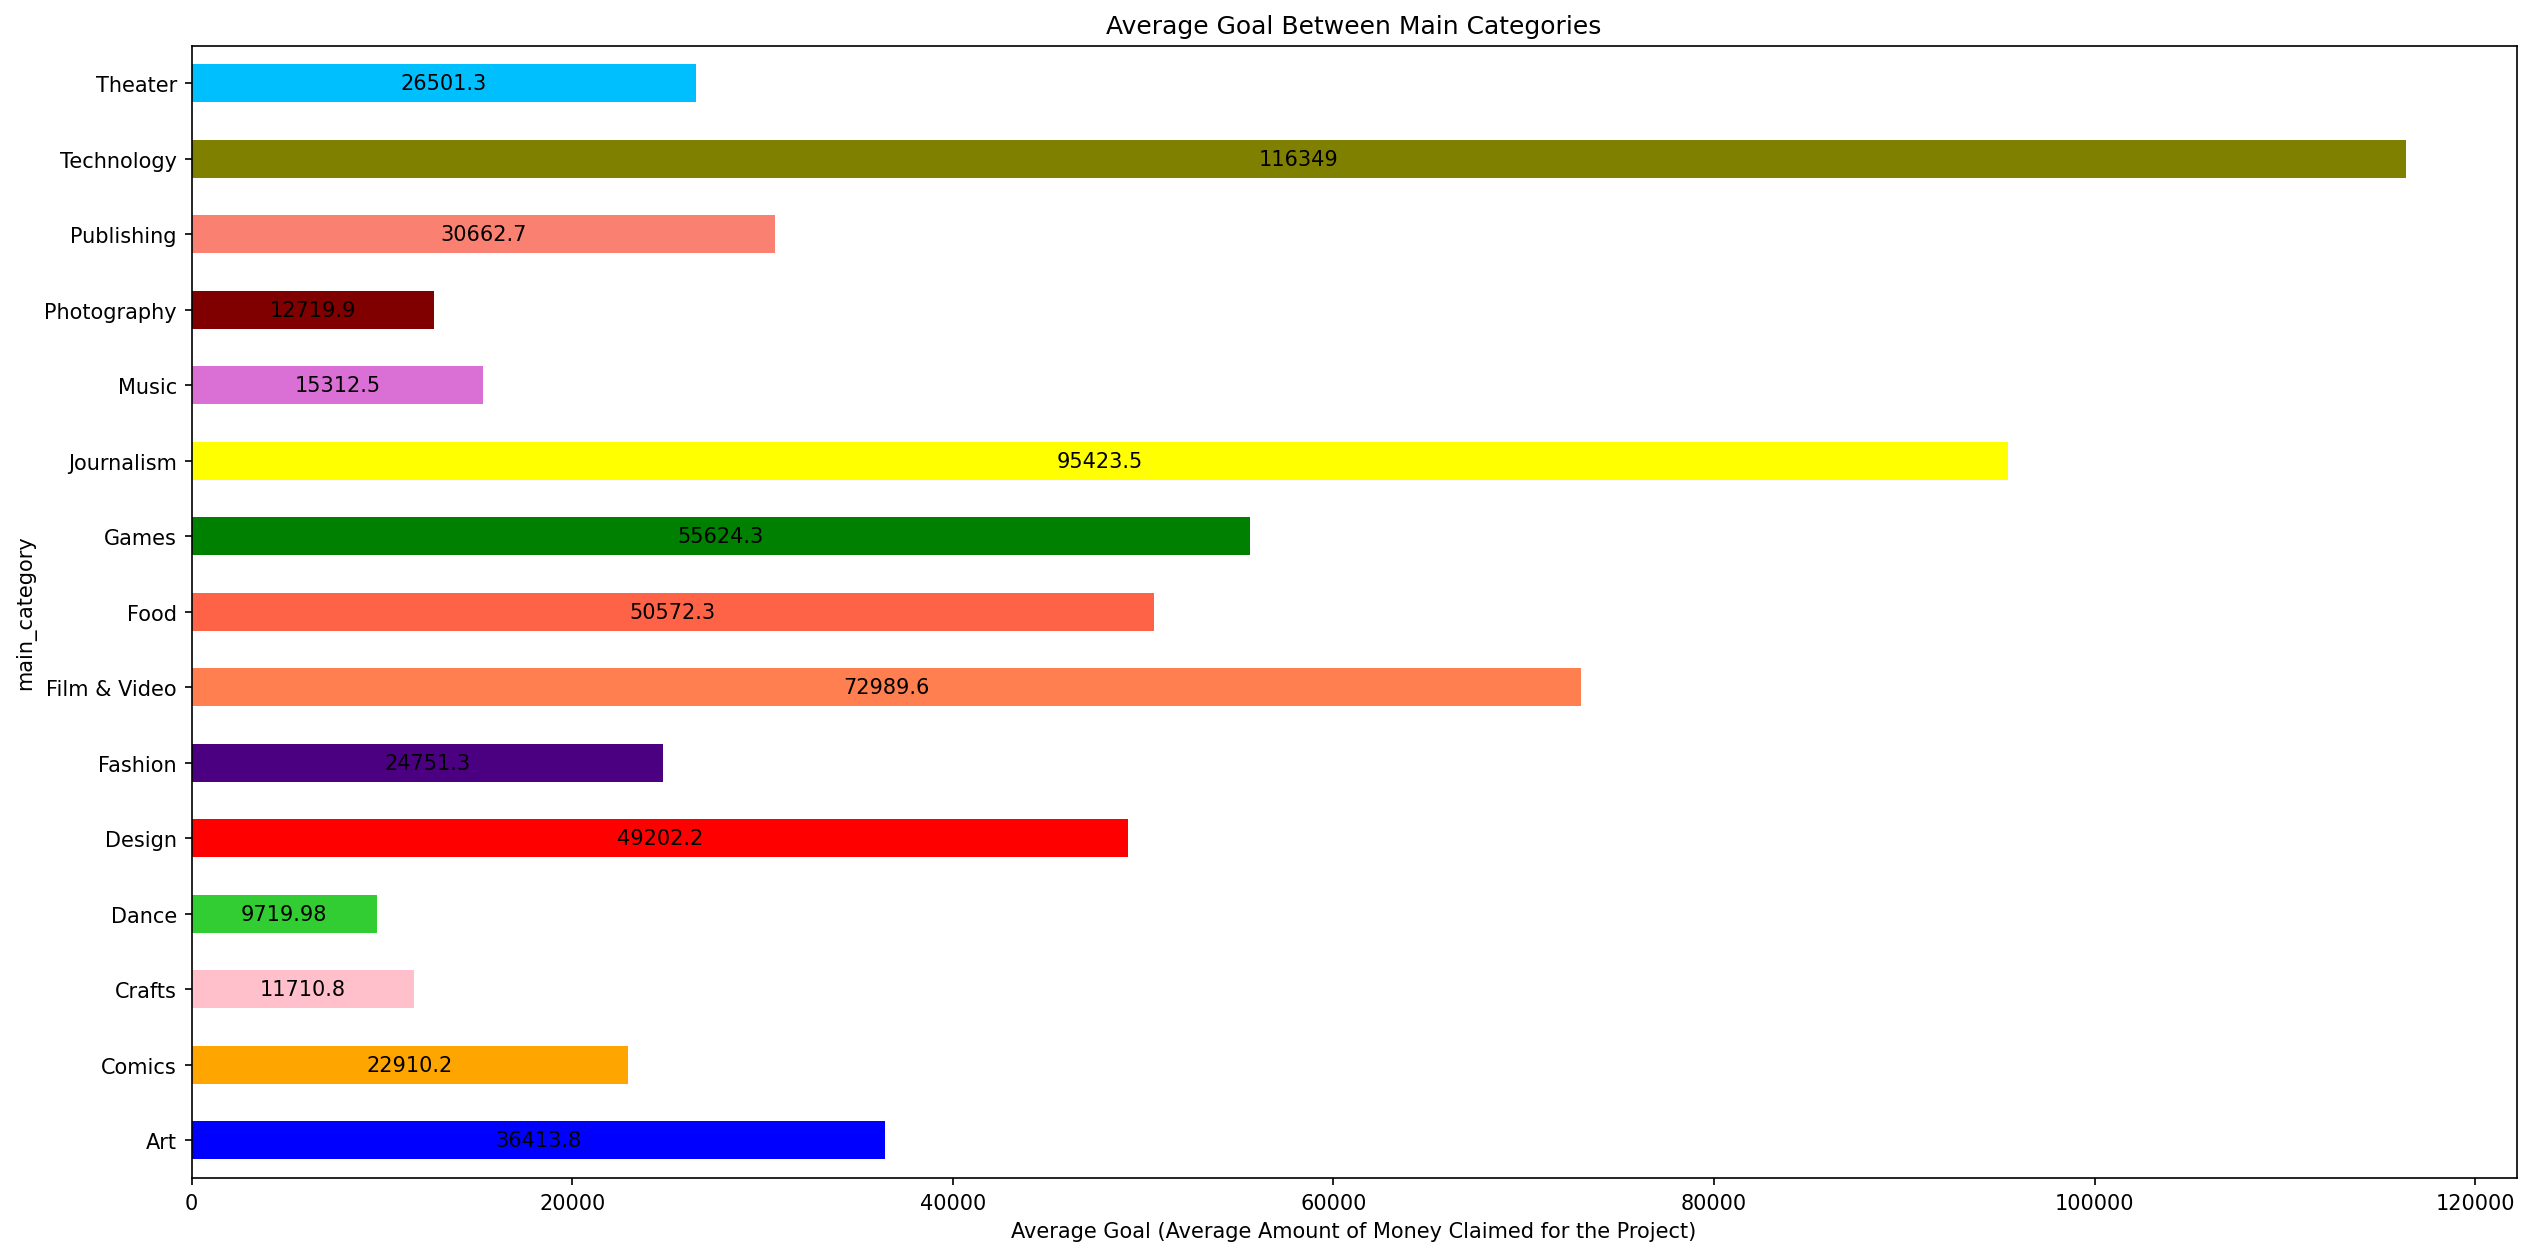

In [22]:
# Plot Average Duration between Main Categories

from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=150)

plt.title("Average Goal Between Main Categories")
plt.xlabel("Average Goal (Average Amount of Money Claimed for the Project)")

ax = group.plot(kind='barh', color=['blue','orange', 'pink', 'limegreen', 'red', 'indigo',
                                   'coral', 'tomato', 'green', 'yellow', 'orchid',
                                   'maroon', 'salmon', 'olive', 'deepskyblue'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Machine Learning Modelling and Predictions

In [23]:
# Create features and target dataframes
X = df.drop(["name", "Duration", "main_category"], axis=1)
y = df["main_category"]

In [24]:
# Check first 5 rows of features dataframe
X.head()

,goal,sub_category
0,1000.0,Poetry
1,45000.0,Narrative Film
2,5000.0,Music
3,19500.0,Film & Video
4,50000.0,Restaurants


In [25]:
# Check first 5 rows of target dataframe
pd.DataFrame(y.head())

,main_category
0,Publishing
1,Film & Video
2,Music
3,Film & Video
4,Food


In [26]:
# One-Hot Encoding and Dummy Encoding for Dealing with Sub Category Categorical Variable
X = pd.get_dummies(X, columns = ['sub_category'])
X.head()

,goal,sub_category_3D Printing,sub_category_Academic,sub_category_Accessories,sub_category_Action,sub_category_Animals,sub_category_Animation,sub_category_Anthologies,sub_category_Apparel,sub_category_Apps,sub_category_Architecture,sub_category_Art,sub_category_Art Books,sub_category_Audio,sub_category_Bacon,sub_category_Blues,sub_category_Calendars,sub_category_Camera Equipment,sub_category_Candles,sub_category_Ceramics,sub_category_Children's Books,sub_category_Childrenswear,sub_category_Chiptune,sub_category_Civic Design,sub_category_Classical Music,sub_category_Comedy,sub_category_Comic Books,sub_category_Comics,sub_category_Community Gardens,sub_category_Conceptual Art,sub_category_Cookbooks,sub_category_Country & Folk,sub_category_Couture,sub_category_Crafts,sub_category_Crochet,sub_category_DIY,sub_category_DIY Electronics,sub_category_Dance,sub_category_Design,sub_category_Digital Art,...,sub_category_R&B,sub_category_Radio & Podcasts,sub_category_Ready-to-wear,sub_category_Residencies,sub_category_Restaurants,sub_category_Robots,sub_category_Rock,sub_category_Romance,sub_category_Science Fiction,sub_category_Sculpture,sub_category_Shorts,sub_category_Small Batch,sub_category_Software,sub_category_Sound,sub_category_Space Exploration,sub_category_Spaces,sub_category_Stationery,sub_category_Tabletop Games,sub_category_Taxidermy,sub_category_Technology,sub_category_Television,sub_category_Textiles,sub_category_Theater,sub_category_Thrillers,sub_category_Translations,sub_category_Typography,sub_category_Vegan,sub_category_Video,sub_category_Video Art,sub_category_Video Games,sub_category_Wearables,sub_category_Weaving,sub_category_Web,sub_category_Webcomics,sub_category_Webseries,sub_category_Woodworking,sub_category_Workshops,sub_category_World Music,sub_category_Young Adult,sub_category_Zines
0,1000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Splitting DataFrame into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Scaling Training Dataset (X_train and X_test) to Standardize/Normalize
def scaling(X_train, X_test):
  scaler = StandardScaler()

  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
  X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

  return X_train_scale, X_test_scale

In [29]:
X_train, X_test = scaling(X_train, X_test)

In [30]:
# Modelling on Revised Training Dataset  (X_train_scale and y_train_scale)
# Predicting on test set (X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

def train_predict_model(model_name, X_train, X_test, y_train):
    model = model_name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred
    
def model_classification_report(model_name, X_train, X_test, y_train, y_test):
    y_pred = train_predict_model(model_name, X_train, X_test, y_train)

    # Use classification to evaluate model
    print(classification_report(y_test, y_pred))

def confusion_matrix(model_name, X_train, X_test, y_train, y_test):
    y_pred = train_predict_model(model_name, X_train, X_test, y_train)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(25,25))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
# Accuracy using Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
model_classification_report(log_reg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         Art       1.00      1.00      1.00      7081
      Comics       0.97      0.99      0.98      2666
      Crafts       1.00      1.00      1.00      2163
       Dance       1.00      0.95      0.97       999
      Design       1.00      1.00      1.00      7097
     Fashion       1.00      1.00      1.00      5553
Film & Video       1.00      1.00      1.00     17327
        Food       0.98      1.00      0.99      6446
       Games       1.00      1.00      1.00      8394
  Journalism       1.00      0.75      0.86      1248
       Music       1.00      1.00      1.00     14048
 Photography       1.00      1.00      1.00      2873
  Publishing       1.00      0.99      1.00     10172
  Technology       0.96      1.00      0.98      7906
     Theater       0.98      0.96      0.97      2962

    accuracy                           0.99     96935
   macro avg       0.99      0.98      0.98     96935
weighted avg       0.99   

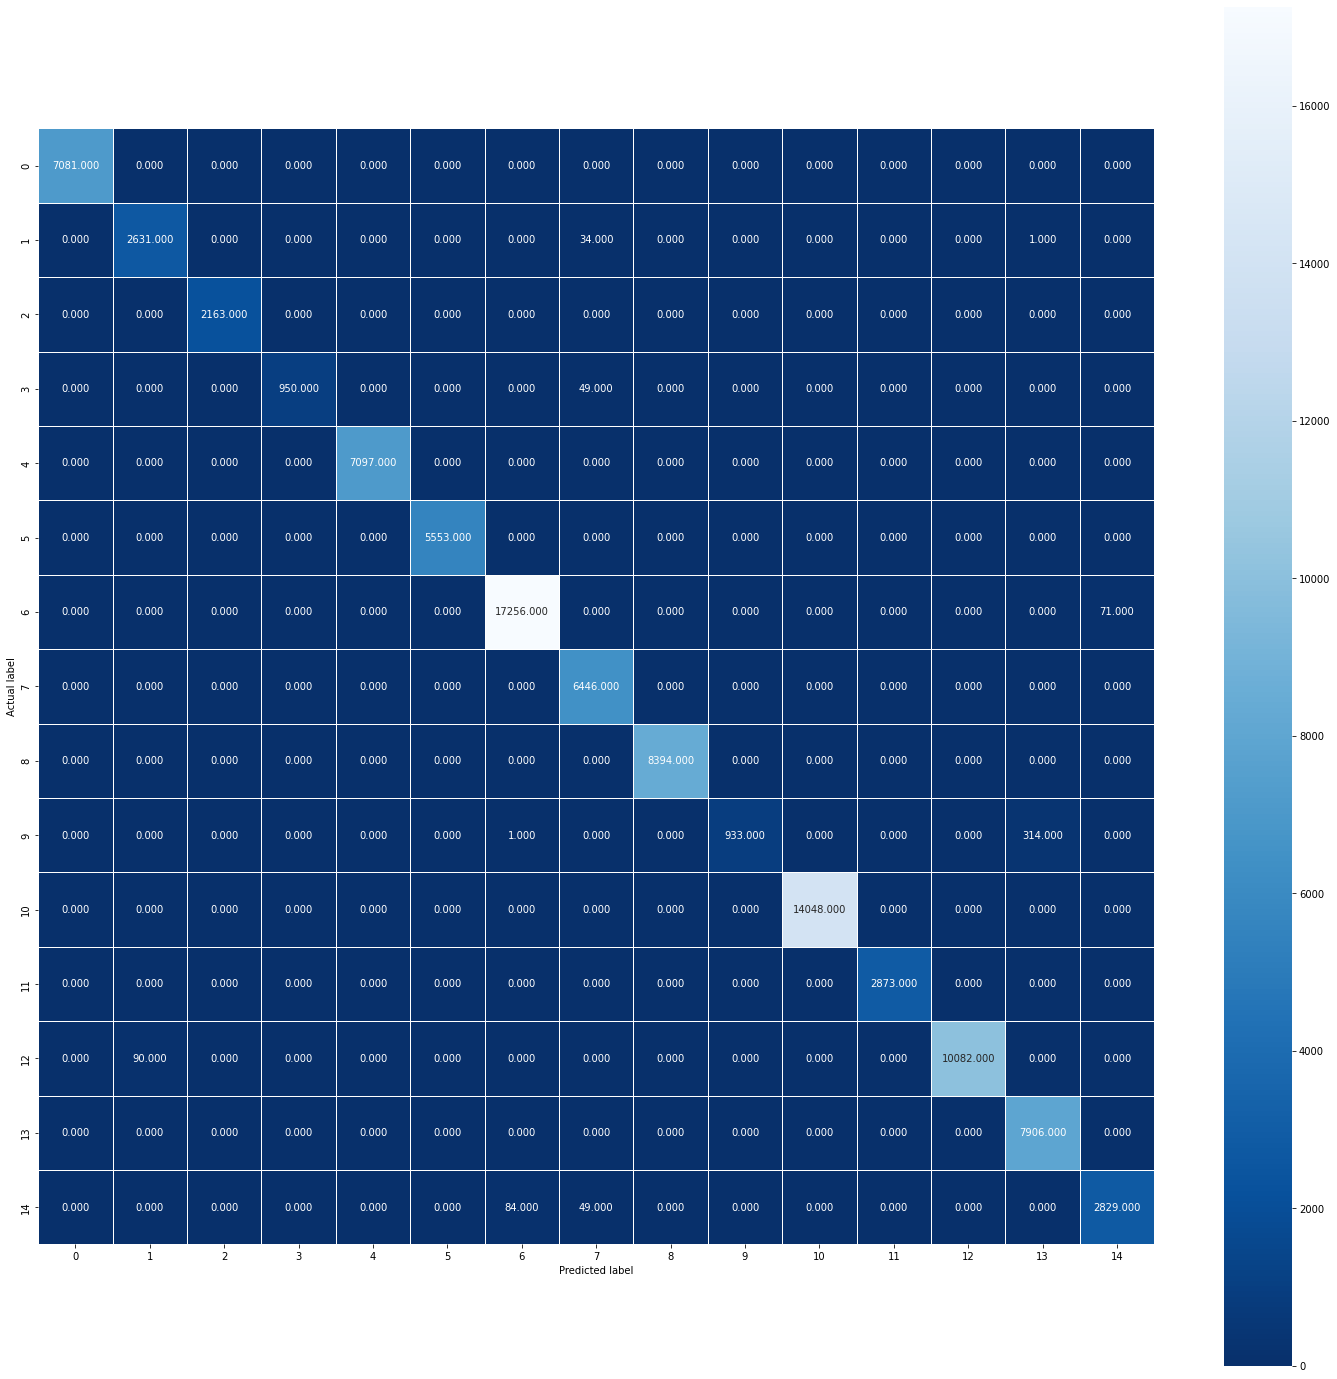

In [ ]:
# Confusion Matrix of Accuracy of Logistic Regression
confusion_matrix(log_reg, X_train, X_test, y_train, y_test)

In [ ]:
# Classification Report using xgBoost Classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
model_classification_report(xgb_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         Art       1.00      1.00      1.00      7081
      Comics       0.97      0.99      0.98      2666
      Crafts       1.00      1.00      1.00      2163
       Dance       0.96      0.97      0.97       999
      Design       1.00      1.00      1.00      7097
     Fashion       1.00      1.00      1.00      5553
Film & Video       1.00      0.99      0.99     17327
        Food       0.99      1.00      0.99      6446
       Games       1.00      1.00      1.00      8394
  Journalism       1.00      0.75      0.86      1248
       Music       1.00      1.00      1.00     14048
 Photography       1.00      1.00      1.00      2873
  Publishing       1.00      0.99      1.00     10172
  Technology       0.96      1.00      0.98      7906
     Theater       0.94      0.98      0.96      2962

    accuracy                           0.99     96935
   macro avg       0.99      0.98      0.98     96935
weighted avg       0.99   

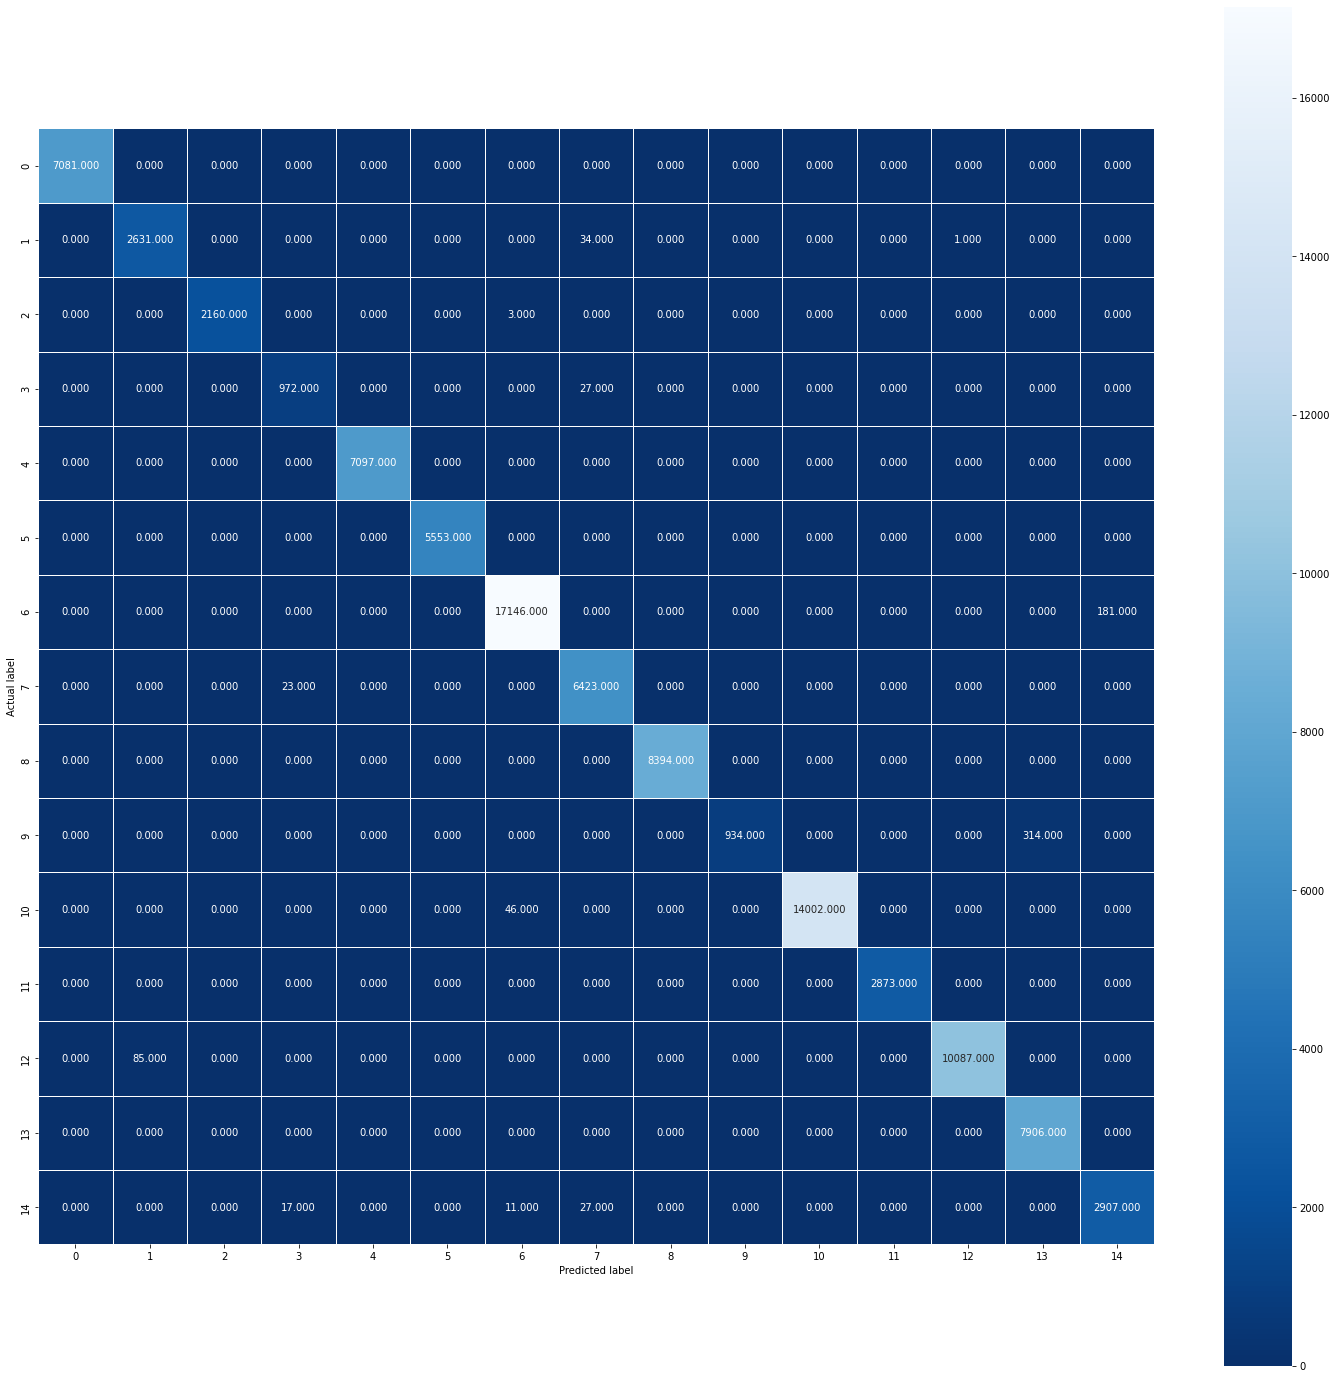

In [ ]:
# Confusion Matrix of Accuracy of xgBoost Classifier
confusion_matrix(xgb_model, X_train, X_test, y_train, y_test)